In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [3]:
from sklearn.metrics import confusion_matrix

# TO DO ANOMALY DETECTION 
- Perform anomaly detection, 
- Data need to divide by two grouop ("Normal", "various Attack ")

In [242]:
data = pd.read_csv("ins_fraud.csv")

In [243]:
X = data.drop(['fraud', 'c24'], axis=1)
y = data['fraud']

train = data[data['c24'] == 0]
test = data[data['c24'] == 1]

x_train = train.drop(['fraud', 'c24'], axis=1)
y_train = train['fraud']
x_test = test.drop(['fraud', 'c24'], axis=1)
y_test = test['fraud']

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]

In [244]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

data.drop('fraud',axis=1,inplace=True)

df_normal = data[normal_mask].drop("c24", 1)
df_attack = data[attack_mask].drop("c24", 1)

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 15959
Attack count: 41


In [245]:
# Convert DataFrame into Numpy arrays, keras need numpy
x_normal = df_normal.values
x_attack = df_attack.values

## Training the Autoencoder 

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
x_normal_train = train[train["fraud"] == 0].drop(["fraud", "c24"], 1)
x_normal_test = test[test["fraud"] == 0].drop(["fraud", "c24"], 1)

- important to note that we are not using the outcome column as a label to predict
- This anomaly detection is unsupervised
- **no target (y)**
- train an autoencoder on the normal data 
- see how well it can detect that the data not flagged as "normal" represents an anomaly

In [248]:
print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")

Normal train count: 12845
Normal test count: 3114


# How to learn?

- The autoencoder will learn to compress the data to a vector of just three numbers
- autoencoder should be able to also decompress with reasonable accuracy

In [249]:
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [250]:
model = AutoEncoder(output_units=x_normal_train.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_normal_train,
    x_normal_train,
    epochs=100,
    batch_size=512,
    validation_data=(x_normal_train, x_normal_train)
)

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 8.1843 - mse: 453758681088.0000 - val_loss: 8.0502 - val_mse: 453758746624.0000
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 7.9901 - mse: 453758681088.0000 - val_loss: 7.9312 - val_mse: 453758746624.0000
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 7.9189 - mse: 453758746624.0000 - val_loss: 7.9185 - val_mse: 453758746624.0000
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 7.9012 - mse: 453758681088.0000 - val_loss: 7.9157 - val_mse: 453758746624.0000
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 7.8908 - mse: 453758681088.0000 - val_loss: 7.9126 - val_mse: 453758746624.0000
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 7.8794 - mse: 453758746624.0000 - val_loss: 7.9098 - val_mse: 453758746624.0000
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 7.8558 - 

26/26 [==============================] - 0s 4ms/step - loss: 7.4142 - mse: 453758681088.0000 - val_loss: 7.4120 - val_mse: 453758681088.0000
Epoch 55/100
26/26 [==============================] - 0s 4ms/step - loss: 7.4140 - mse: 453758615552.0000 - val_loss: 7.4121 - val_mse: 453758681088.0000
Epoch 56/100
26/26 [==============================] - 0s 4ms/step - loss: 7.4144 - mse: 453758746624.0000 - val_loss: 7.4121 - val_mse: 453758681088.0000
Epoch 57/100
26/26 [==============================] - 0s 4ms/step - loss: 7.4138 - mse: 453758648320.0000 - val_loss: 7.4120 - val_mse: 453758681088.0000
Epoch 58/100
26/26 [==============================] - 0s 4ms/step - loss: 7.4138 - mse: 453758779392.0000 - val_loss: 7.4119 - val_mse: 453758681088.0000
Epoch 59/100
26/26 [==============================] - 0s 3ms/step - loss: 7.4131 - mse: 453758615552.0000 - val_loss: 7.4119 - val_mse: 453758681088.0000
Epoch 60/100
26/26 [==============================] - 0s 4ms/step - loss: 7.4134 - mse: 4

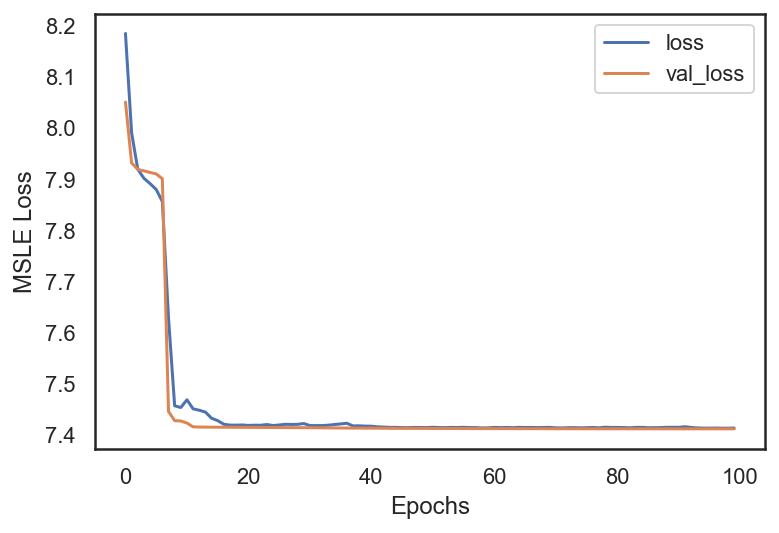

In [251]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

# Detecting an Anomaly 

- encoding data that represents an attack. This higher error indicates an anomaly.

In [252]:
pred = model.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = model.predict(x_normal)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal))
pred = model.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Anormal Data (RMSE): {score3}")

Out of Sample Normal Score (RMSE): 711039.5726636463
Insample Normal Score (RMSE): 681079.8580358344
Anormal Data (RMSE): 598974.3295507284


In [253]:
def find_threshold(model, x_train):
  reconstructions = model.predict(x_train)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test, threshold):
  predictions = model.predict(x_test)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

In [254]:
threshold = find_threshold(model, x_normal_train)
print(f"Threshold: {threshold}")
predictions = get_predictions(model, x_test, threshold)
confusion_matrix(y_test, predictions)

Threshold: 12.542673209815135


array([[2457,  657],
       [   6,    1]])

In [ ]:
# 한개 맞췄따...

In [255]:
from sklearn import metrics    

print('정확도 :', metrics.accuracy_score(y_test, predictions))

print('precision', metrics.precision_score(y_test, predictions))

print('recall', metrics.recall_score(y_test, predictions))

print('f1', metrics.f1_score(y_test, predictions))

정확도 : 0.787568087151554
precision 0.001519756838905775
recall 0.14285714285714285
f1 0.0030075187969924814


# Autoencoder Scaled

In [256]:
data = pd.read_csv("ins_fraud.csv")

In [257]:
# last column is the target
# 0 = anomaly, 1 = normal
TARGET = "fraud"

features = data.drop(["fraud", "c24"], axis=1)
target = data[TARGET]

x_train = train.drop(['fraud', 'c24'], axis=1)
y_train = train['fraud']
x_test = test.drop(['fraud', 'c24'], axis=1)
y_test = test['fraud']

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]

# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [258]:
train_data

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,2,1,3,0,2,0,100,2,0,0,...,1.302547e+05,0,1,0,0,1,0,0,0,-1
3,3,1,3,0,4,0,0,2,0,0,...,1.341009e+06,0,3,1,0,1,0,0,0,-1
4,1,0,1,0,1,0,100,1,0,0,...,5.240306e+05,1209410,1,0,0,2,0,0,0,-1
8,2,0,4,0,4,0,0,1,0,0,...,0.000000e+00,0,1,0,0,1,1,1,1,2
10,3,0,1,0,1,0,100,3,0,0,...,2.480358e+05,0,5,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,2,0,3,1,4,0,100,1,0,0,...,6.672931e+05,0,0,0,0,1,0,0,0,-1
15995,2,0,2,0,2,0,100,2,0,0,...,0.000000e+00,0,1,1,0,1,0,0,0,-1
15996,2,0,2,1,4,0,100,1,1,0,...,6.184394e+05,0,2,1,0,1,0,0,0,-1
15998,2,0,2,0,2,0,100,2,0,0,...,0.000000e+00,0,4,1,0,1,0,0,0,-1


In [259]:
# create a model by subclassing Model class in tensorflow

model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 0.1042 - mse: 0.1759 - val_loss: 0.0750 - val_mse: 0.1342
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0576 - mse: 0.1081 - val_loss: 0.0580 - val_mse: 0.1180
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0463 - mse: 0.0922 - val_loss: 0.0496 - val_mse: 0.1028
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0427 - mse: 0.0861 - val_loss: 0.0469 - val_mse: 0.0973
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - mse: 0.0826 - val_loss: 0.0452 - val_mse: 0.0939
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mse: 0.0792 - val_loss: 0.0424 - val_mse: 0.0886
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0361 - mse: 0.0739 - val_loss: 0.0391 - val_mse: 0.0818
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0337 - m

26/26 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0377 - val_loss: 0.0195 - val_mse: 0.0404
Epoch 64/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0376 - val_loss: 0.0194 - val_mse: 0.0404
Epoch 65/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0182 - mse: 0.0373 - val_loss: 0.0194 - val_mse: 0.0403
Epoch 66/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0372 - val_loss: 0.0194 - val_mse: 0.0402
Epoch 67/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0371 - val_loss: 0.0193 - val_mse: 0.0400
Epoch 68/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0180 - mse: 0.0370 - val_loss: 0.0192 - val_mse: 0.0399
Epoch 69/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0180 - mse: 0.0370 - val_loss: 0.0191 - val_mse: 0.0397
Epoch 70/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0179 - mse: 0

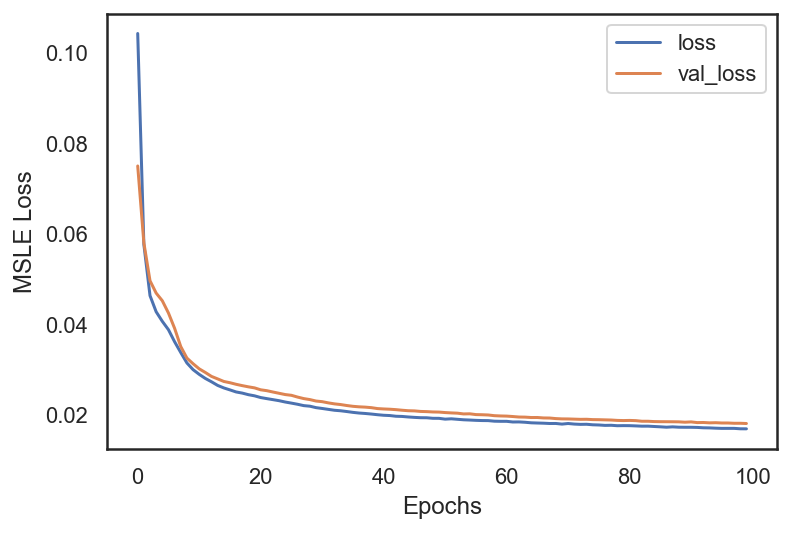

In [260]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [261]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.024740500524155946


0.7420698494072413

In [262]:
confusion_matrix(y_test, predictions)

array([[2313,  801],
       [   4,    3]])

In [263]:
from sklearn import metrics    

print('정확도 :', metrics.accuracy_score(y_test, predictions))

print('precision', metrics.precision_score(y_test, predictions))

print('recall', metrics.recall_score(y_test, predictions))

print('f1', metrics.f1_score(y_test, predictions))

정확도 : 0.7420698494072413
precision 0.0037313432835820895
recall 0.42857142857142855
f1 0.007398273736128237


# Standard Scaled

In [159]:
data = pd.read_csv("ins_fraud.csv")

In [225]:
from sklearn.preprocessing import StandardScaler
# last column is the target
# 0 = anomaly, 1 = normal
TARGET = "fraud"

features = data.drop(["fraud", "c24"], axis=1)
target = data[TARGET]

x_train = train.drop(['fraud', 'c24'], axis=1)
y_train = train['fraud']
x_test = test.drop(['fraud', 'c24'], axis=1)
y_test = test['fraud']

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]

# min max scale the input data
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(train_data.copy())
x_test_scaled = standard_scaler.transform(x_test.copy())

In [226]:
# create a model by subclassing Model class in tensorflow

model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 0.1756 - mse: 1.2321 - val_loss: 0.1786 - val_mse: 1.2577
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1435 - mse: 1.0856 - val_loss: 0.1406 - val_mse: 1.0954
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1181 - mse: 0.9763 - val_loss: 0.1289 - val_mse: 1.0485
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.1114 - mse: 0.9476 - val_loss: 0.1240 - val_mse: 1.0255
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.1083 - mse: 0.9340 - val_loss: 0.1217 - val_mse: 1.0187
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1061 - mse: 0.9254 - val_loss: 0.1186 - val_mse: 1.0044
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.1035 - mse: 0.9144 - val_loss: 0.1164 - val_mse: 0.9957
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1013 - m

26/26 [==============================] - 0s 3ms/step - loss: 0.0712 - mse: 0.7647 - val_loss: 0.0779 - val_mse: 0.8193
Epoch 64/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0710 - mse: 0.7638 - val_loss: 0.0778 - val_mse: 0.8184
Epoch 65/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0713 - mse: 0.7650 - val_loss: 0.0777 - val_mse: 0.8179
Epoch 66/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0709 - mse: 0.7643 - val_loss: 0.0774 - val_mse: 0.8174
Epoch 67/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0710 - mse: 0.7635 - val_loss: 0.0775 - val_mse: 0.8174
Epoch 68/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0706 - mse: 0.7621 - val_loss: 0.0772 - val_mse: 0.8141
Epoch 69/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0708 - mse: 0.7622 - val_loss: 0.0770 - val_mse: 0.8141
Epoch 70/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0703 - mse: 0

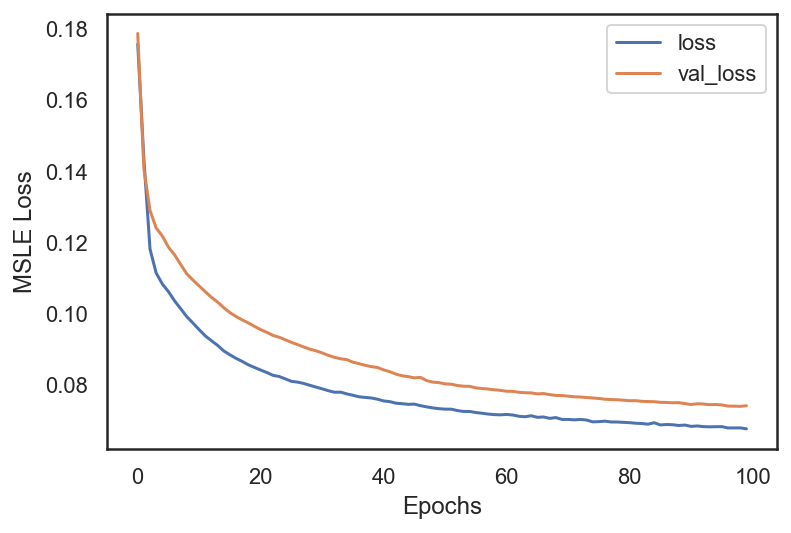

In [227]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [228]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.11036878893761448


0.8253764818968279

In [229]:
confusion_matrix(y_test, predictions)

array([[2575,  539],
       [   6,    1]])

In [230]:
from sklearn import metrics    

print('정확도 :', metrics.accuracy_score(y_test, predictions))

print('precision', metrics.precision_score(y_test, predictions))

print('recall', metrics.recall_score(y_test, predictions))

print('f1', metrics.f1_score(y_test, predictions))

정확도 : 0.8253764818968279
precision 0.001851851851851852
recall 0.14285714285714285
f1 0.0036563071297989035


In [26]:
# 와아 1개 맞았당 

# 다시 해보기 z-score 맞춰서  

In [270]:
data = pd.read_csv("ins_fraud.csv")

In [271]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

In [272]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [273]:
# last column is the target
# 1 = anomaly, 0 = normal
TARGET = "fraud"

X = data.drop(["fraud", "c24"], axis=1)
y = data[TARGET]

x_train = train.drop(['fraud', 'c24'], axis=1)
y_train = train['fraud']
x_test = test.drop(['fraud', 'c24'], axis=1)
y_test = test['fraud']

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]

# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [274]:
# create a model by subclassing Model class in tensorflow

model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
26/26 [==============================] - 1s 7ms/step - loss: 0.1009 - mse: 0.1708 - val_loss: 0.0659 - val_mse: 0.1231
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0537 - mse: 0.1030 - val_loss: 0.0543 - val_mse: 0.1114
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0450 - mse: 0.0900 - val_loss: 0.0482 - val_mse: 0.1003
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0422 - mse: 0.0849 - val_loss: 0.0462 - val_mse: 0.0954
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0403 - mse: 0.0819 - val_loss: 0.0444 - val_mse: 0.0922
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0385 - mse: 0.0788 - val_loss: 0.0407 - val_mse: 0.0854
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0362 - mse: 0.0745 - val_loss: 0.0377 - val_mse: 0.0792
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0345 - m

26/26 [==============================] - 0s 3ms/step - loss: 0.0194 - mse: 0.0399 - val_loss: 0.0209 - val_mse: 0.0437
Epoch 64/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0194 - mse: 0.0398 - val_loss: 0.0209 - val_mse: 0.0434
Epoch 65/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0193 - mse: 0.0396 - val_loss: 0.0208 - val_mse: 0.0433
Epoch 66/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0192 - mse: 0.0396 - val_loss: 0.0207 - val_mse: 0.0431
Epoch 67/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0192 - mse: 0.0394 - val_loss: 0.0207 - val_mse: 0.0431
Epoch 68/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mse: 0.0393 - val_loss: 0.0206 - val_mse: 0.0429
Epoch 69/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mse: 0.0393 - val_loss: 0.0205 - val_mse: 0.0428
Epoch 70/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0189 - mse: 0

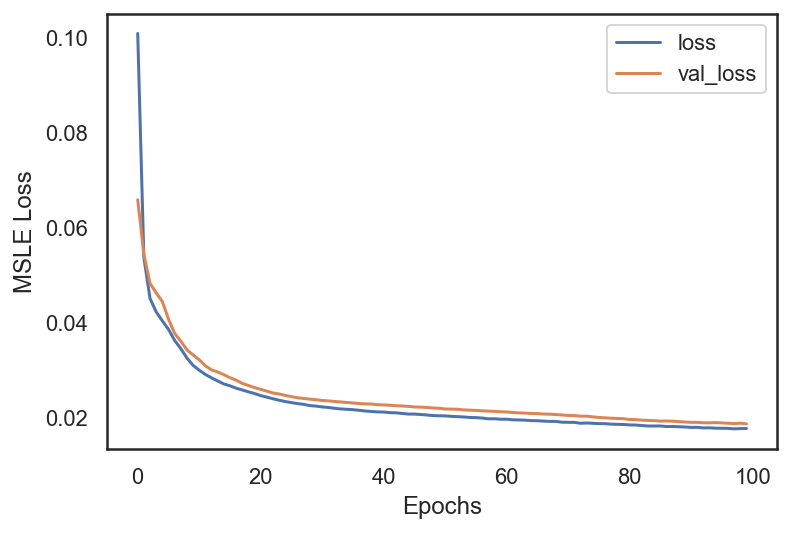

In [275]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [276]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.02530315976633793


0.7350208266581224

In [277]:
confusion_matrix(y_test, predictions)

array([[2291,  823],
       [   4,    3]])

In [278]:
from sklearn import metrics    

print('정확도 :', metrics.accuracy_score(y_test, predictions))

print('precision', metrics.precision_score(y_test, predictions))

print('recall', metrics.recall_score(y_test, predictions))

print('f1', metrics.f1_score(y_test, predictions))

정확도 : 0.7350208266581224
precision 0.0036319612590799033
recall 0.42857142857142855
f1 0.007202881152460985


In [ ]:
# 와아 두개 

# CLUSTERING 해보자 

In [208]:
data = pd.read_csv("ins_fraud.csv")

In [209]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

In [210]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [211]:
X = data.drop(['fraud', 'c24'], axis=1)
y = data['fraud']

train = data[data['c24'] == 0]
test = data[data['c24'] == 1]

X_train = train.drop(['fraud', 'c24'], axis=1)
y_train = train['fraud']
X_test = test.drop(['fraud', 'c24'], axis=1)
y_test = test['fraud']

In [212]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

In [213]:
data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask].drop("c24", 1)
df_attack = data[attack_mask].drop("c24", 1)


print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 15959
Attack count: 41


In [214]:
x_normal = df_normal.values
x_attack = df_attack.values

In [215]:
x_normal

array([[ 2.,  1.,  3., ...,  0.,  0., -1.],
       [ 1.,  0.,  4., ...,  1.,  1.,  0.],
       [ 1.,  0.,  4., ...,  1.,  1.,  0.],
       ...,
       [ 2.,  1.,  2., ...,  0.,  0., -1.],
       [ 2.,  0.,  2., ...,  0.,  0., -1.],
       [ 2.,  0.,  2., ...,  0.,  0., -1.]])

In [216]:
model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to

model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(X_train, X_train, epochs=100, batch_size=256)

Epoch 1/100
51/51 [==============================] - 0s 1ms/step - loss: 2.7601
Epoch 2/100
51/51 [==============================] - 0s 939us/step - loss: 1.0424
Epoch 3/100
51/51 [==============================] - 0s 912us/step - loss: 0.7052
Epoch 4/100
51/51 [==============================] - 0s 794us/step - loss: 0.6606
Epoch 5/100
51/51 [==============================] - 0s 798us/step - loss: 0.6320
Epoch 6/100
51/51 [==============================] - 0s 940us/step - loss: 0.6115
Epoch 7/100
51/51 [==============================] - 0s 864us/step - loss: 0.5937
Epoch 8/100
51/51 [==============================] - 0s 817us/step - loss: 0.5747
Epoch 9/100
51/51 [==============================] - 0s 841us/step - loss: 0.5490
Epoch 10/100
51/51 [==============================] - 0s 911us/step - loss: 0.5239
Epoch 11/100
51/51 [==============================] - 0s 826us/step - loss: 0.5068
Epoch 12/100
51/51 [==============================] - 0s 904us/step - loss: 0.4966
Epoch 13/100
51

Epoch 100/100
51/51 [==============================] - 0s 831us/step - loss: 0.3804


In [217]:
# 잠재 변수 벡터 확보 
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(X_train)
print(latent_vector.shape)
print(latent_vector[0])

(12879, 23)
[ 1.7203074   0.09248623  2.687534    0.06971888  2.5431402   0.01102752
  0.11557817  1.8025068   0.0611109   0.0582881   3.9455287   2.1732082
  4.110943    0.03856531 -0.2455491   1.0044484   0.30737168  0.22156264
  0.0858295   0.03070536  0.06978498  0.03690309 -0.9812879 ]


In [218]:
%%time 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=13)
kmeans.fit(latent_vector)

CPU times: user 2.38 s, sys: 638 ms, total: 3.02 s
Wall time: 592 ms


KMeans(n_clusters=10, random_state=13)

In [219]:
# 군집 결과 
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[3 4 2 ... 3 9 3]
(10, 23)
[ 1.7010258e+00  1.1025570e-01  2.5952713e+00  7.8067236e-02
  2.3788674e+00  6.1405904e-04 -4.4595361e-01  1.7127637e+00
  1.5496469e-01  9.0597600e-02  4.5737143e+00  2.2975147e+00
  5.4000978e+00 -1.7104730e-02  2.4759190e-01  8.6398757e-01
  3.5570475e-01  2.5941074e-01  2.4460811e-02  9.8884642e-01
  1.2691197e+00  9.8568469e-01  1.0274124e+00]


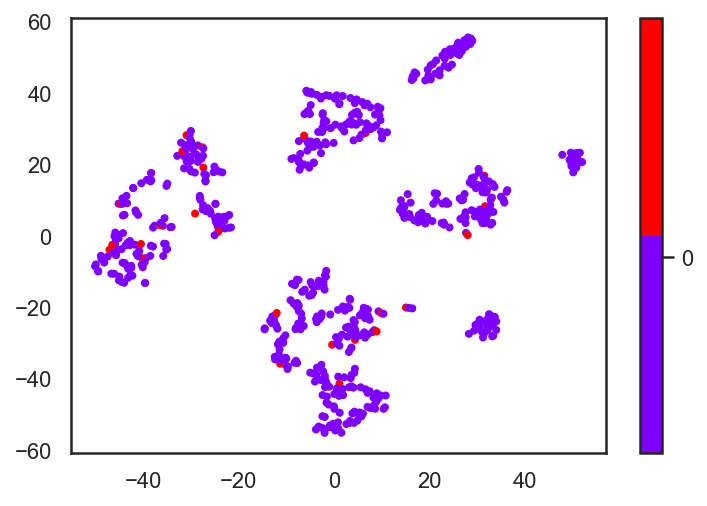

CPU times: user 11 s, sys: 314 ms, total: 11.4 s
Wall time: 1.7 s


In [220]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=13)
tsne_vector = tsne.fit_transform(latent_vector[:621])

cmap = plt.get_cmap('rainbow', 2)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=y_train[:621], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1) / n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

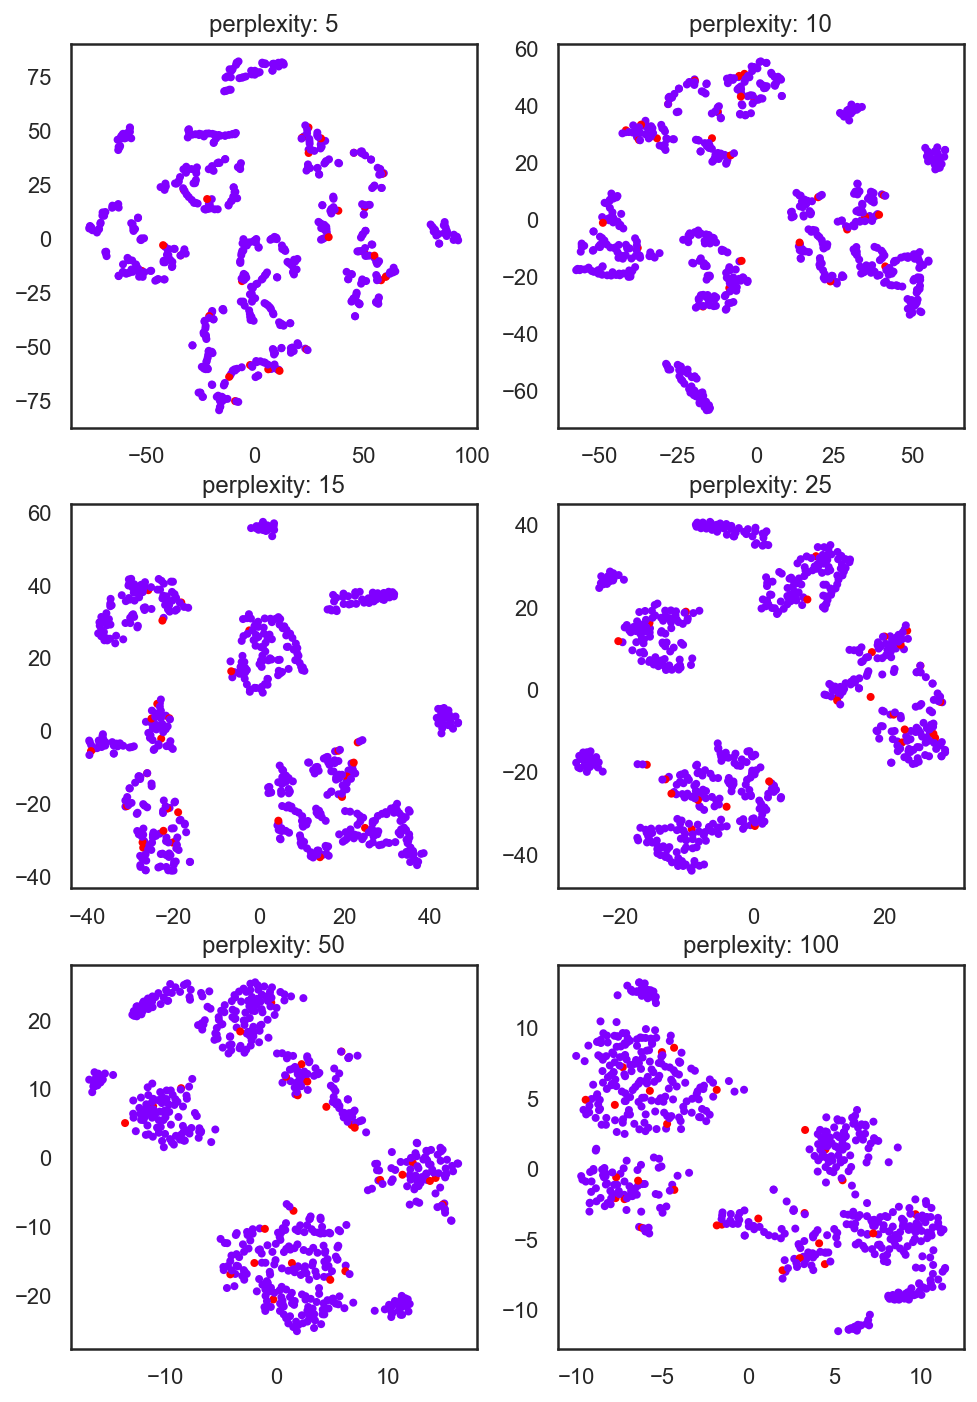

In [221]:
# 최근접이웃의 숫자 perplexities tuning 
perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8, 12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:621])
    
    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=y_train[:621], cmap='rainbow')
    plt.title('perplexity: {0}'.format(perplexities[c]))
plt.show()

In [ ]:
# 분포도를 보니 큰 의미는 없는 것 같다 